<a href="https://colab.research.google.com/github/gehad-Ahmed30/Time-series-Forecasting/blob/main/Time_series_Forecasting(Avocado).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML CASE-STUDIES | TIME-SERIES FORECASTING (TSF)

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Predicting Avocado Prices | Facebook Prophet (TSF Case-study)

Dataset Source: https://www.kaggle.com/datasets/neuromusic/avocado-prices

Facebook Prophet: https://facebook.github.io/prophet/

## Importing & Inspecting Data

In [2]:
data = pd.read_csv('/kaggle/input/avocado-prices/avocado.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
data = data.sort_values('Date')

In [5]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


## Exploring Data

Text(0.5, 0, 'Date')

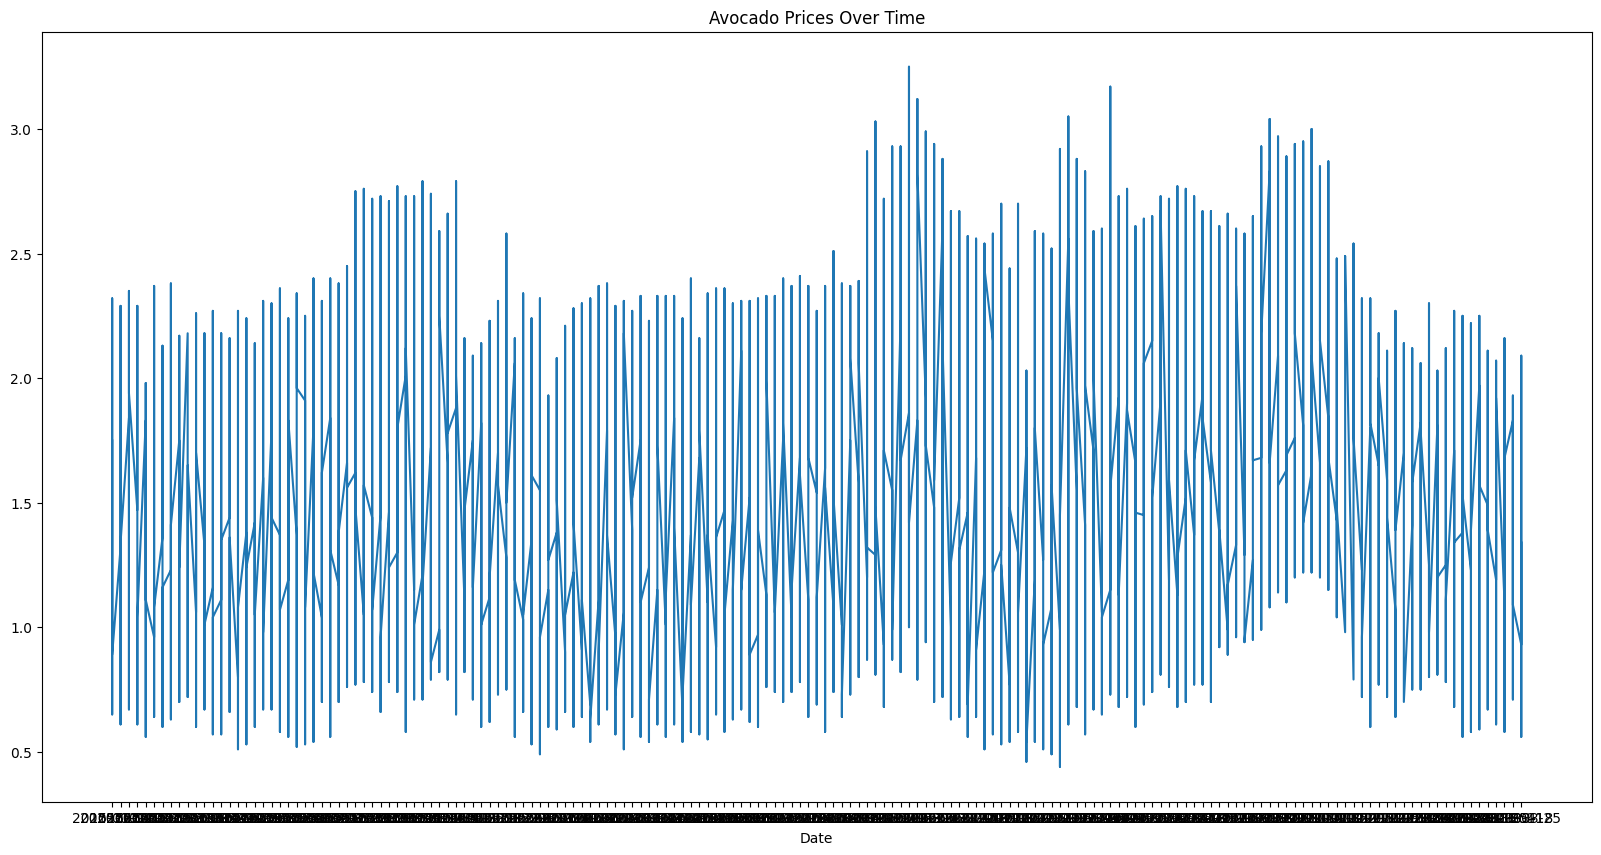

In [6]:
plt.figure(figsize=(20,10))
plt.plot(data['Date'], data['AveragePrice'])
plt.title('Avocado Prices Over Time')
plt.xlabel('Date')

## Pre-processing Data

In [7]:
avocado_ts = data[['Date', 'AveragePrice']]
avocado_ts.head()

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


In [8]:
avocado_ts.columns = ['ds','y']
avocado_ts.head()

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


## Model Training & Building

In [9]:
from prophet import Prophet


In [10]:
m = Prophet()
m.fit(avocado_ts)

17:02:58 - cmdstanpy - INFO - Chain [1] start processing
17:03:01 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
future=m.make_future_dataframe(periods=365)
future.head()

,ds
0,2015-01-04
1,2015-01-11
2,2015-01-18
3,2015-01-25
4,2015-02-01


In [12]:
forcast=m.predict(future)
forcast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.499339,0.887718,1.906061,1.499339,1.499339,-0.114632,-0.114632,-0.114632,-0.114632,-0.114632,-0.114632,0.0,0.0,0.0,1.384707
1,2015-01-11,1.494128,0.901991,1.864772,1.494128,1.494128,-0.106271,-0.106271,-0.106271,-0.106271,-0.106271,-0.106271,0.0,0.0,0.0,1.387858
2,2015-01-18,1.488918,0.927190,1.893626,1.488918,1.488918,-0.105998,-0.105998,-0.105998,-0.105998,-0.105998,-0.105998,0.0,0.0,0.0,1.382920
3,2015-01-25,1.483708,0.889336,1.833036,1.483708,1.483708,-0.124993,-0.124993,-0.124993,-0.124993,-0.124993,-0.124993,0.0,0.0,0.0,1.358715
4,2015-02-01,1.478498,0.815853,1.803528,1.478498,1.478498,-0.153378,-0.153378,-0.153378,-0.153378,-0.153378,-0.153378,0.0,0.0,0.0,1.325120


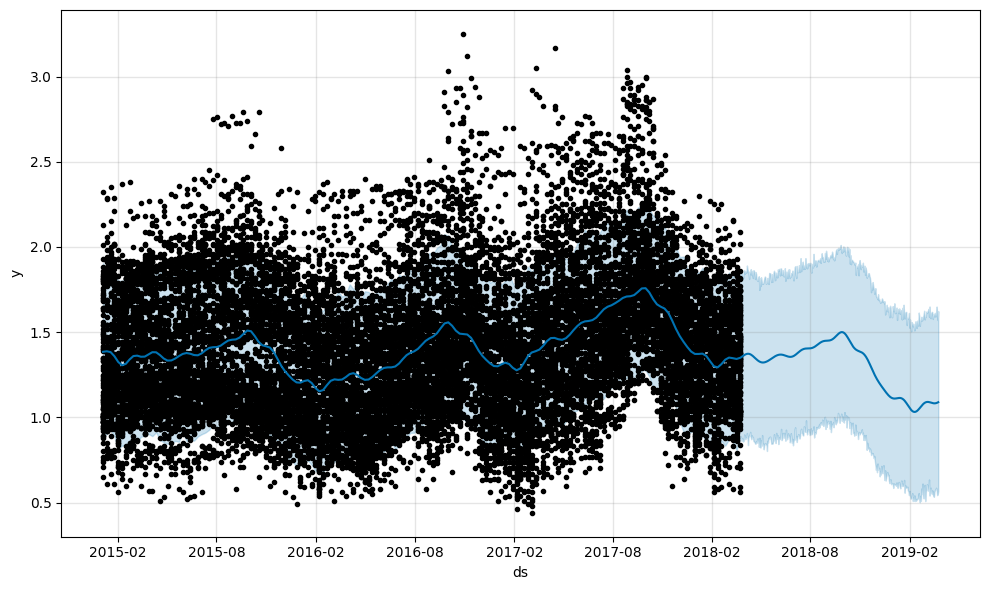

In [13]:
figure1=m.plot(forcast)

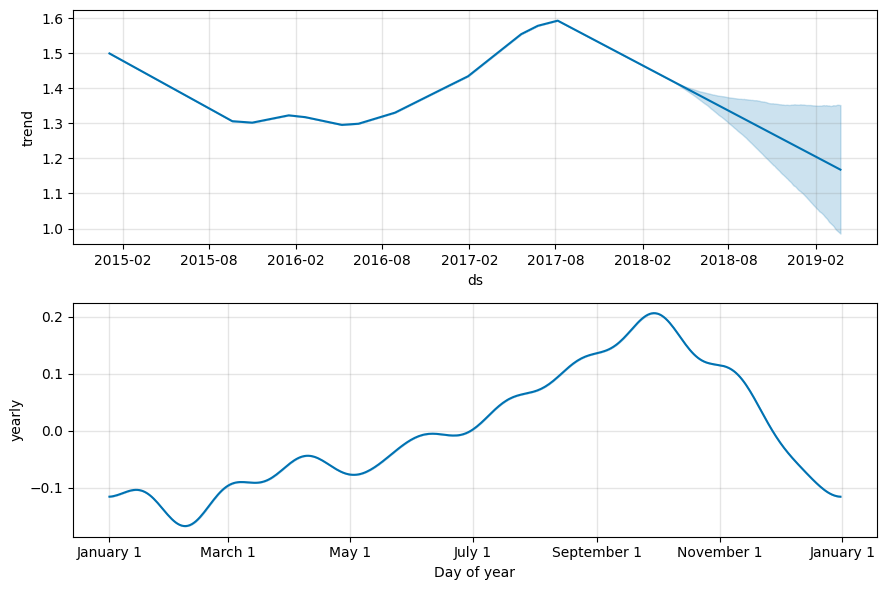

In [14]:
figure2 = m.plot_components(forcast)